# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [4]:
sales.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

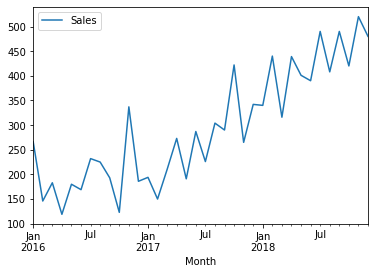

In [5]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


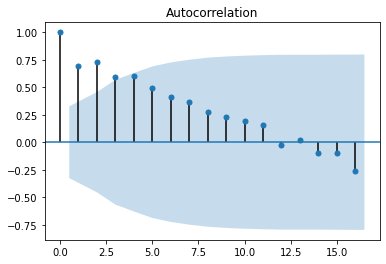

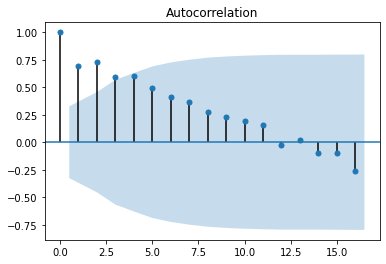

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [7]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [8]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [9]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [10]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


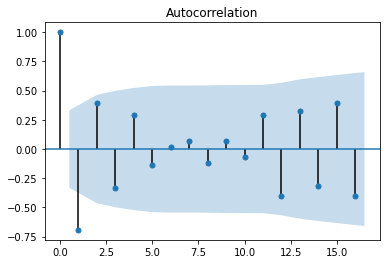

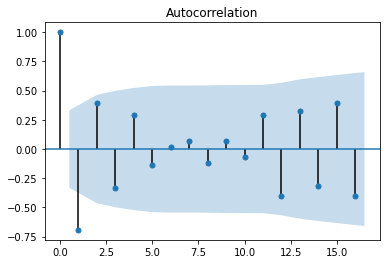

In [11]:
plot_acf(sales_diff)

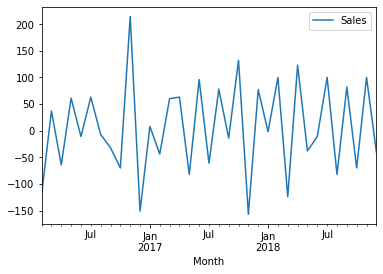

In [12]:
sales_diff.plot()

In [13]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [14]:
train.size

27

# Autoreggresive AR Model

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [16]:
predictions = model_ar_fit.predict(start=26,end=36)

In [17]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

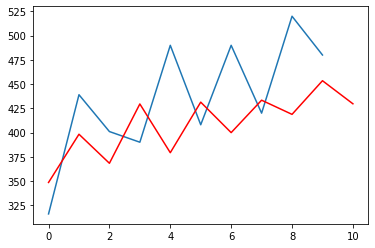

In [18]:
plt.plot(test)
plt.plot(predictions,color='red')

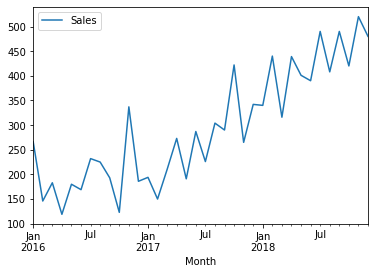

In [19]:
sales.plot()

# ARIMA model

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print('AIC:', model_arima_fit.aic)
print('BIC:', model_arima_fit.bic)

AIC: 297.16198448645855
BIC: 310.56961856000873


In [22]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([396.03940517, 355.93762383, 413.09280032, 374.50280954,
       446.92157912, 378.60477376, 406.36174202, 411.36352501,
       475.85762267, 415.35541969])

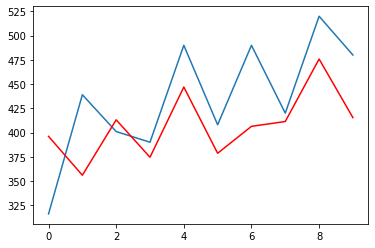

In [23]:
plt.plot(test)
plt.plot(predictions,color='red')

In [24]:
mean_squared_error(test,predictions)

2960.931125516403

In [25]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [26]:
import warnings
warnings.filterwarnings('ignore')

results = {}

for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        results[param] = model_arima_fit.aic
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028714074
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415407510785
(0, 1, 2) 296.3229226907768
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469668978
(1, 0, 0) 316.16687175230527
(1, 0, 1) 313.0487174413604
(1, 0, 2) 310.9790642228339
(1, 0, 4) 309.67799311516603
(1, 1, 0) 298.8325442272106
(1, 1, 1) 297.12565112584997
(1, 1, 2) 299.4716667063077
(1, 1, 3) 301.28511809483723
(1, 2, 0) 306.53077675709926
(2, 0, 0) 310.9969573612434
(2, 0, 1) 340.63684691058955
(2, 1, 0) 300.20895612399613
(2, 1, 1) 297.99999301673466
(2, 1, 2) 298.55054281303313
(2, 1, 3) 302.872082155264
(2, 2, 0) 306.2975856432721
(3, 0, 0) 312.983858742753
(3, 0, 1) 335.1034894494791
(3, 1, 0) 294.85435842186934
(3, 1, 1) 295.9979353418425
(3, 1, 2) 292.66862386940596
(3, 1, 3) 294.65889075165717
(3, 2, 0) 299.40758681556133
(3, 2, 4) 291.2750485164804
(4, 0, 0) 311.0706562036774
(4, 0, 1) 321.86672463889374
(4, 0

In [27]:
results
temp = min(results.values())
res = [key for key in results if results[key] == temp]
res

[(3, 2, 4)]

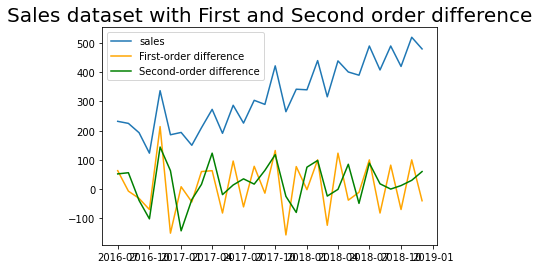

In [33]:
# First and second order difference
sales['Sales_Diff1'] = sales['Sales'].diff()
sales['Sales_Diff2'] = sales['Sales'].diff(2)

# Don't forget to drop missing values
sales = sales.dropna()

# Plot
plt.title('Sales dataset with First and Second order difference', size=20)
plt.plot(sales['Sales'], label='sales')
plt.plot(sales['Sales_Diff1'], label='First-order difference', color='orange')
plt.plot(sales['Sales_Diff2'], label='Second-order difference', color='green')
plt.legend();

In [36]:
# Perform ADF test
from statsmodels.tsa.stattools import adfuller
adf_diff_1 = adfuller(sales['Sales_Diff1'])
adf_diff_2 = adfuller(sales['Sales_Diff2'])

# Extract P-values
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

<IPython.core.display.Javascript object>

P-value for 1st order difference: 0.00292


<IPython.core.display.Javascript object>

P-value for 2nd order difference: 0.0109


In [37]:
def make_stationary(data: pd.Series, alpha: float = 0.05, max_diff_order: int = 10) -> dict:
    # Test to see if the time series is already stationary
    if adfuller(data)[1] < alpha:
        return {
            'differencing_order': 0,
            'time_series': np.array(data)
        }
    
    # A list to store P-Values
    p_values = []
    
    # Test for differencing orders from 1 to max_diff_order (included)
    for i in range(1, max_diff_order + 1):
        # Perform ADF test
        result = adfuller(data.diff(i).dropna())
        # Append P-value
        p_values.append((i, result[1]))
        
    # Keep only those where P-value is lower than significance level
    significant = [p for p in p_values if p[1] < alpha]
    # Sort by the differencing order
    significant = sorted(significant, key=lambda x: x[0])
    
    # Get the differencing order
    diff_order = significant[0][0]
    
    # Make the time series stationary
    stationary_series = data.diff(diff_order).dropna()
    
    return {
        'differencing_order': diff_order,
        'time_series': np.array(stationary_series)
    }

In [65]:
make_stationary(sales.Sales)

<IPython.core.display.Javascript object>

{'differencing_order': 4,
 'time_series': array([ -86.,   23.,   49.,  106.,   13.,  -46.,  105.,  -39.,    1.,
          27., -127.,   87.,   -3.,  137.,   16.,   31.,   99.,  135.,
          39.,   38.,   50.,   18.,   51.,   97.,   61.,  -50.,  174.,
         -31.,   89.,   30.,   30.,   72.])}